Aerofit Treadmill Business Case (Descriptive Statistical Analysis)

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

Reading the CSV file

In [2]:
df=pd.read_csv('aerofit_treadmill.csv')

In [3]:
df

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
0,KP281,18,Male,14,Single,3,4,29562,112
1,KP281,19,Male,15,Single,2,3,31836,75
2,KP281,19,Female,14,Partnered,4,3,30699,66
3,KP281,19,Male,12,Single,3,3,32973,85
4,KP281,20,Male,13,Partnered,4,2,35247,47
...,...,...,...,...,...,...,...,...,...
175,KP781,40,Male,21,Single,6,5,83416,200
176,KP781,42,Male,18,Single,5,4,89641,200
177,KP781,45,Male,16,Single,5,5,90886,160
178,KP781,47,Male,18,Partnered,4,5,104581,120


In [17]:

df.head()


,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
0,KP281,18,Male,14,Single,3,4,29562,112
1,KP281,19,Male,15,Single,2,3,31836,75
2,KP281,19,Female,14,Partnered,4,3,30699,66
3,KP281,19,Male,12,Single,3,3,32973,85
4,KP281,20,Male,13,Partnered,4,2,35247,47


In [18]:
df.shape

(180, 9)

The Data has 180 rows and 9 columns

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Product        180 non-null    object
 1   Age            180 non-null    int64 
 2   Gender         180 non-null    object
 3   Education      180 non-null    int64 
 4   MaritalStatus  180 non-null    object
 5   Usage          180 non-null    int64 
 6   Fitness        180 non-null    int64 
 7   Income         180 non-null    int64 
 8   Miles          180 non-null    int64 
dtypes: int64(6), object(3)
memory usage: 12.8+ KB


In [20]:
df.describe()

,Age,Education,Usage,Fitness,Income,Miles
count,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000
mean,28.788889,15.572222,3.455556,3.311111,53719.577778,103.194444
std,6.943498,1.617055,1.084797,0.958869,16506.684226,51.863605
min,18.000000,12.000000,2.000000,1.000000,29562.000000,21.000000
25%,24.000000,14.000000,3.000000,3.000000,44058.750000,66.000000
50%,26.000000,16.000000,3.000000,3.000000,50596.500000,94.000000
75%,33.000000,16.000000,4.000000,4.000000,58668.000000,114.750000
max,50.000000,21.000000,7.000000,5.000000,104581.000000,360.000000


Checking the null values if any

In [21]:
df.isna().sum()

Product          0
Age              0
Gender           0
Education        0
MaritalStatus    0
Usage            0
Fitness          0
Income           0
Miles            0
dtype: int64

Data contains no null or missing values

In [22]:
df.dtypes

Product          object
Age               int64
Gender           object
Education         int64
MaritalStatus    object
Usage             int64
Fitness           int64
Income            int64
Miles             int64
dtype: object

In [24]:
for i in df.columns:
 print(i, ":",df[i].nunique())

Product : 3
Age : 32
Gender : 2
Education : 8
MaritalStatus : 2
Usage : 6
Fitness : 5
Income : 62
Miles : 37


From the above observation, we can conclude that only Income, Miles and Age can be considered as Continuous, the rest of the columns
though integers/floats should be considered as categories.

Checking value counts for categorical columns -

In [25]:
df["Product"].value_counts()

Product
KP281    80
KP481    60
KP781    40
Name: count, dtype: int64

In [26]:
df["Gender"].value_counts()

Gender
Male      104
Female     76
Name: count, dtype: int64

In [27]:
df["Education"].value_counts()

Education
16    85
14    55
18    23
15     5
13     5
12     3
21     3
20     1
Name: count, dtype: int64

In [28]:
df["MaritalStatus"].value_counts()

MaritalStatus
Partnered    107
Single        73
Name: count, dtype: int64

In [29]:
df["Usage"].value_counts()

Usage
3    69
4    52
2    33
5    17
6     7
7     2
Name: count, dtype: int64

In [30]:
df["Fitness"].value_counts()

Fitness
3    97
5    31
2    26
4    24
1     2
Name: count, dtype: int64

Now, Lets create a copy of the dataframe

In [31]:
df_copy = df.copy()
df_copy["Gender"].replace(["Male","Female"],[1,0],inplace=True)
df_copy["MaritalStatus"].replace(['Single','Partnered'],[0,1],inplace=True)
df_copy['Product'].replace(['KP281','KP481','KP781'],[0,1,2],inplace=True)
df_copy.corr()

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
Product,1.000000,0.032225,0.230653,0.495018,-0.017602,0.537447,0.594883,0.624168,0.571596
Age,0.032225,1.000000,0.027544,0.280496,0.192152,0.015064,0.061105,0.513414,0.036618
Gender,0.230653,0.027544,1.000000,0.094089,-0.018836,0.214424,0.254609,0.202053,0.217869
Education,0.495018,0.280496,0.094089,1.000000,0.068569,0.395155,0.410581,0.625827,0.307284
MaritalStatus,-0.017602,0.192152,-0.018836,0.068569,1.000000,-0.007786,-0.050751,0.150293,0.025639
Usage,0.537447,0.015064,0.214424,0.395155,-0.007786,1.000000,0.668606,0.519537,0.759130
Fitness,0.594883,0.061105,0.254609,0.410581,-0.050751,0.668606,1.000000,0.535005,0.785702
Income,0.624168,0.513414,0.202053,0.625827,0.150293,0.519537,0.535005,1.000000,0.543473
Miles,0.571596,0.036618,0.217869,0.307284,0.025639,0.759130,0.785702,0.543473,1.000000


Understanding the details by using visualisation

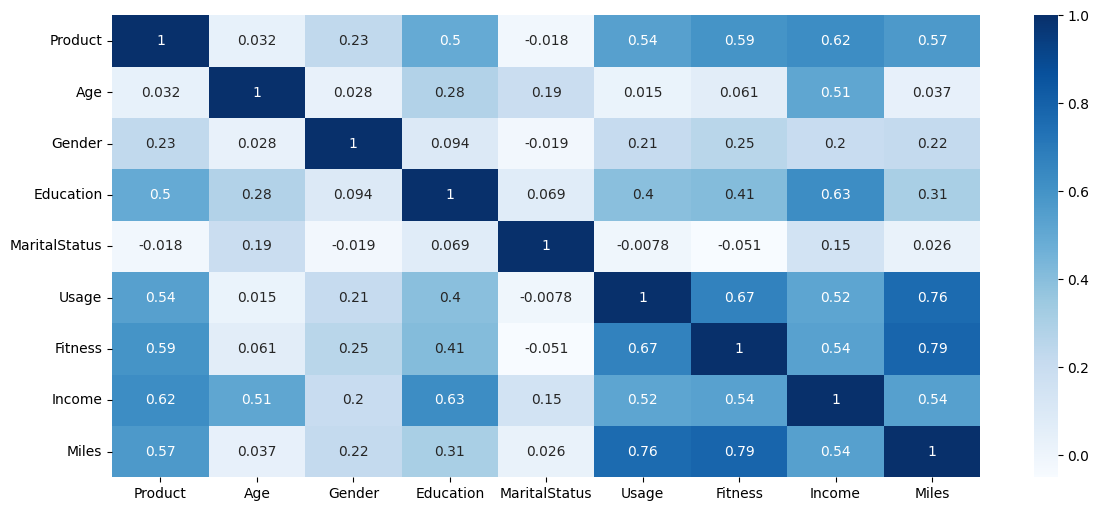

In [33]:
plt.figure(figsize=(14,6))
sns.heatmap(df_copy.corr(),cmap="Blues",annot=True)
plt.show()

Observations:
1) Product (treadmill) purchases are highly corelated with Education, Usage, Fitness, Income, Miles
2) Age is highly correlated to Income (0.51) which definitely seems reasonable. It's also correlated with Education and Marital Status which
stands completely alright.
3) Gender certainly has some correlation to Usage, Fitness, Income and Miles

4) Education is correlated to Age and Miles. It's highly correlated to Income (as expected). It's sufficiently correlated to Usage and Fitness too.
5) Marital Status has some correlation to Income and Age (as expected).
6) Usage is extremely correlated to Fitness and Miles and has a higher correlation with Income as well.
7) Fitness has a great correlation with Income.


Possibiliies:
1) Product, Fitness, Usage and Miles depict a ridiculously higher correlation among themselves which looks as expected since more the usage
implying more miles run and certainly more fitness.
2) Also a story which seems reasonable is that Age and Education (predominately) are indicators of Income which affects the products bought.
The more advanced the product is, the more its usage and hence more the miles run which in turns improves the fitness.
Note:- Above point 2 is just something which may or mayn't be true as Correlation doesn't imply Causation.

Observing the Outliers of Age, Income and Miles -

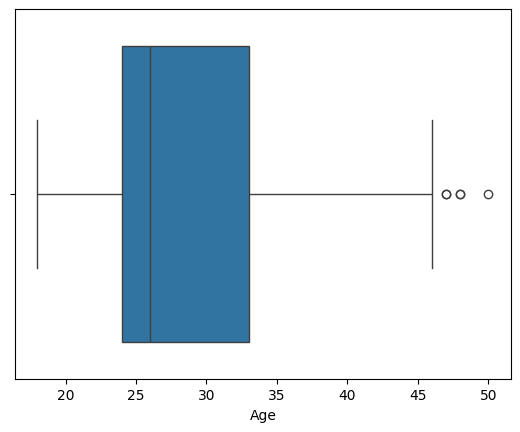

In [34]:
ax = sns.boxplot(x=df['Age'])

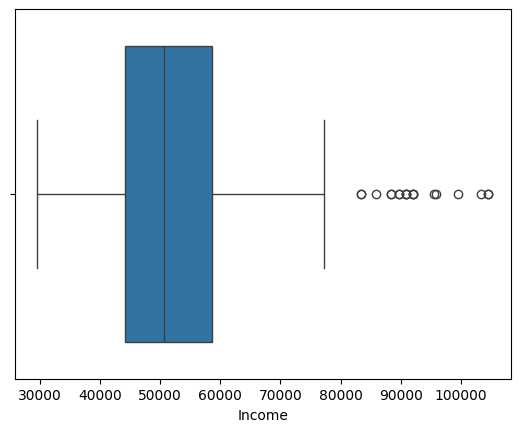

In [35]:
ix = sns.boxplot(x=df["Income"])

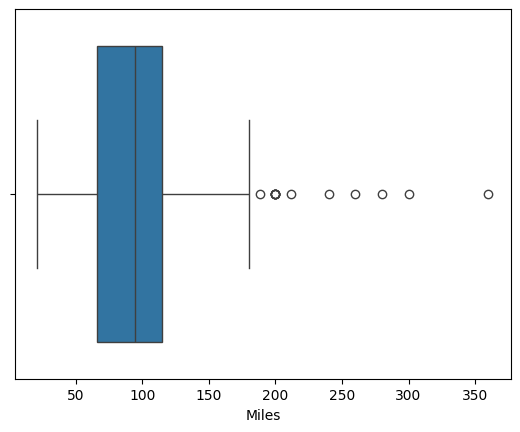

In [36]:
mx = sns.boxplot(x=df["Miles"])

Certainly there are outliers in our data. When we remove them, this leads to loss of information and moreover we have a very small
dataset of 180 rows

 Observing the association between Age and Income -

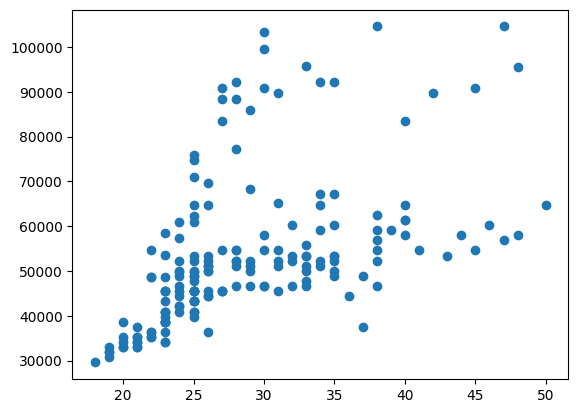

In [37]:
plt.scatter(df['Age'],df["Income"])

C:\Users\rauta\AppData\Local\Temp\ipykernel_2964\178887562.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Age'],hist=True, kde=True,


<function matplotlib.pyplot.show(close=None, block=None)>

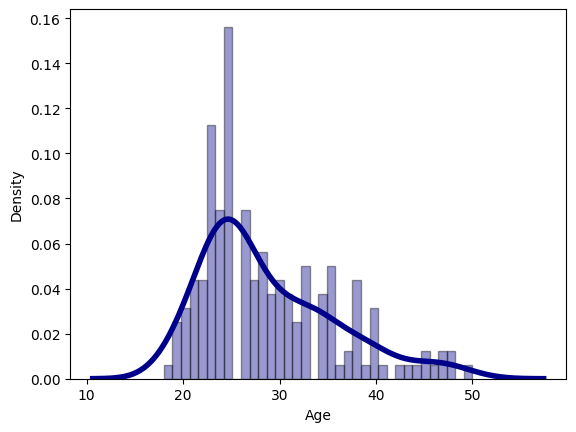

In [38]:
sns.distplot(df['Age'],hist=True, kde=True,
bins=int(36), color = 'darkblue',
hist_kws={'edgecolor':'black'},
kde_kws={'linewidth': 4})
plt.show

 Observing the association between Age and Miles -

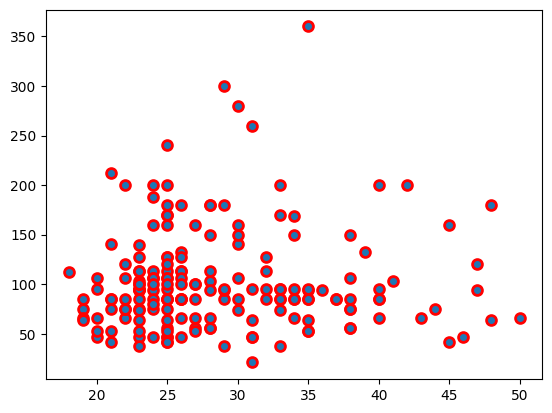

In [39]:
plt.scatter(df['Age'], df['Miles'],
linewidths = 2,
edgecolor ="red",
s = 50)

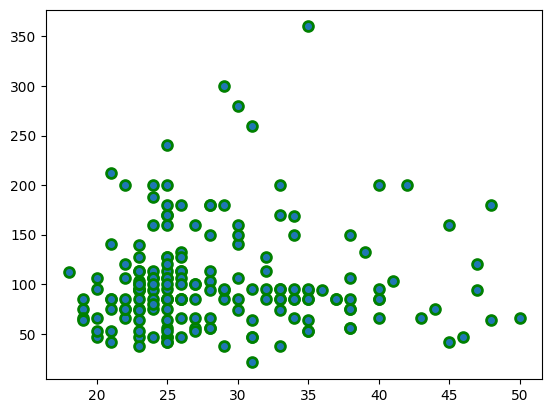

In [40]:
plt.scatter(df['Age'], df['Miles'],
linewidths = 2,
edgecolor ="green",
s = 50)

No significant pattern or observation between Age and Miles run on a treadmill, also implied by heatmap with a correlation of 0.037

Observing the association between Miles and Income -

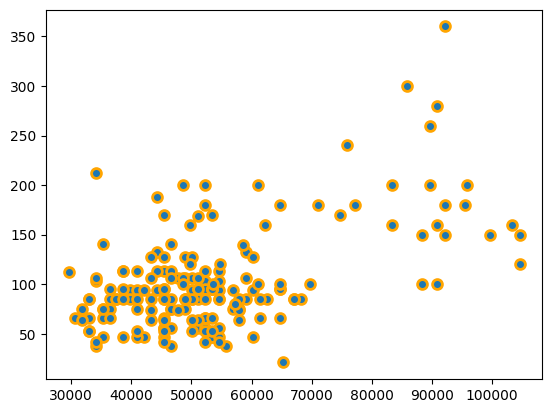

In [42]:
plt.scatter(df['Income'], df['Miles'],
linewidths = 2,
marker ="o",
edgecolor ="orange",
s = 50)


The miles run on treadmill increase significantly with income, infact only people having incomes above 70000 have run over 220 miles.
Moreover there's also a Heteroscadastic effect.

 Analysis of Categorical Columns with the Product -

For this section, We'll be converting the Ages, Incomes and Miles to bins for better analysis

 Observing the ages to create bins -

C:\Users\rauta\AppData\Local\Temp\ipykernel_2964\1143218748.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Age'], hist=True, kde=True,


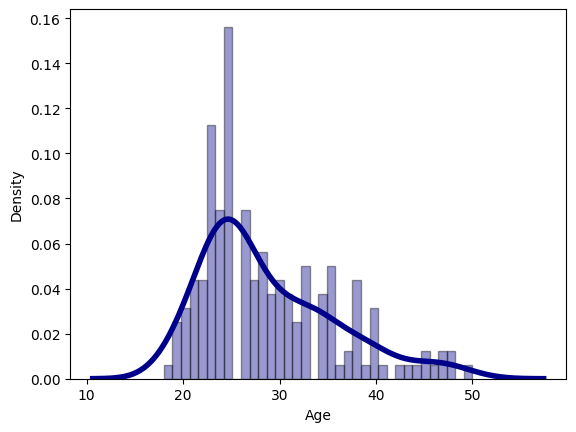

In [44]:
sns.distplot(df['Age'], hist=True, kde=True,
bins=int(36), color = 'darkblue',
hist_kws={'edgecolor':'black'},
kde_kws={'linewidth': 4})
plt.show()

Creating bins on intervals of 5 as age gaps and below 20, above 40 -

In [45]:
bins = [-1,20,25,30,35,40,55]
labels = ['<20','20-25','25-30','30-35','35-40','40+']
df['Age_bins'] = pd.cut(df['Age'], bins=bins, labels=labels)
df.head()


,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles,Age_bins
0,KP281,18,Male,14,Single,3,4,29562,112,<20
1,KP281,19,Male,15,Single,2,3,31836,75,<20
2,KP281,19,Female,14,Partnered,4,3,30699,66,<20
3,KP281,19,Male,12,Single,3,3,32973,85,<20
4,KP281,20,Male,13,Partnered,4,2,35247,47,<20


Observing the incomes to create bins -

C:\Users\rauta\AppData\Local\Temp\ipykernel_2964\3750839988.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Income'], hist=True, kde=True,


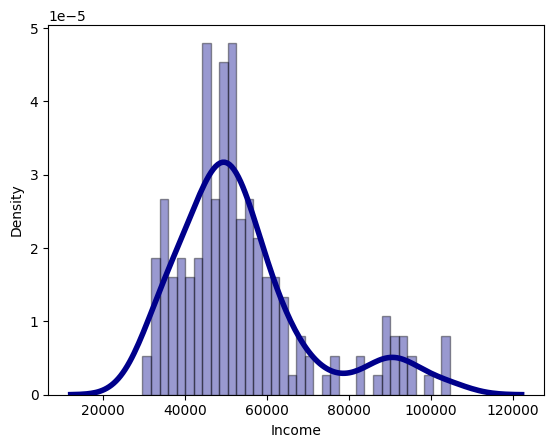

In [46]:
sns.distplot(df['Income'], hist=True, kde=True,
bins=int(36), color = 'darkblue',
hist_kws={'edgecolor':'black'},
kde_kws={'linewidth': 4})
plt.show()

In [47]:
df['Income'].describe()

count       180.000000
mean      53719.577778
std       16506.684226
min       29562.000000
25%       44058.750000
50%       50596.500000
75%       58668.000000
max      104581.000000
Name: Income, dtype: float64

In [48]:
bins = [1,35000,45000,50000,60000,70000,90000,120000]
labels = ['<35000','35000-45000','45000-50000','50000-60000','60000-70000','70000-90000','90000+']
df['Income_bins'] = pd.cut(df['Income'], bins=bins, labels=labels)
df.head()


,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles,Age_bins,Income_bins
0,KP281,18,Male,14,Single,3,4,29562,112,<20,<35000
1,KP281,19,Male,15,Single,2,3,31836,75,<20,<35000
2,KP281,19,Female,14,Partnered,4,3,30699,66,<20,<35000
3,KP281,19,Male,12,Single,3,3,32973,85,<20,<35000
4,KP281,20,Male,13,Partnered,4,2,35247,47,<20,35000-45000


In [49]:
df["Miles"].describe()

count    180.000000
mean     103.194444
std       51.863605
min       21.000000
25%       66.000000
50%       94.000000
75%      114.750000
max      360.000000
Name: Miles, dtype: float64

Creating bins for miles -

In [50]:
bins = [-1,50,100,150,400]
labels = ['<50','50-100','100-150','150+']
df['Mile_bins'] = pd.cut(df['Miles'], bins=bins, labels=labels)
df.head()

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles,Age_bins,Income_bins,Mile_bins
0,KP281,18,Male,14,Single,3,4,29562,112,<20,<35000,100-150
1,KP281,19,Male,15,Single,2,3,31836,75,<20,<35000,50-100
2,KP281,19,Female,14,Partnered,4,3,30699,66,<20,<35000,50-100
3,KP281,19,Male,12,Single,3,3,32973,85,<20,<35000,50-100
4,KP281,20,Male,13,Partnered,4,2,35247,47,<20,35000-45000,<50


Crosstabs -

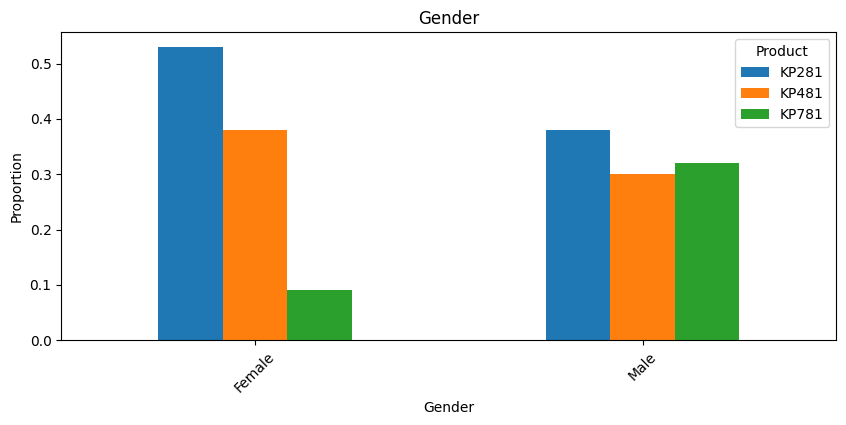

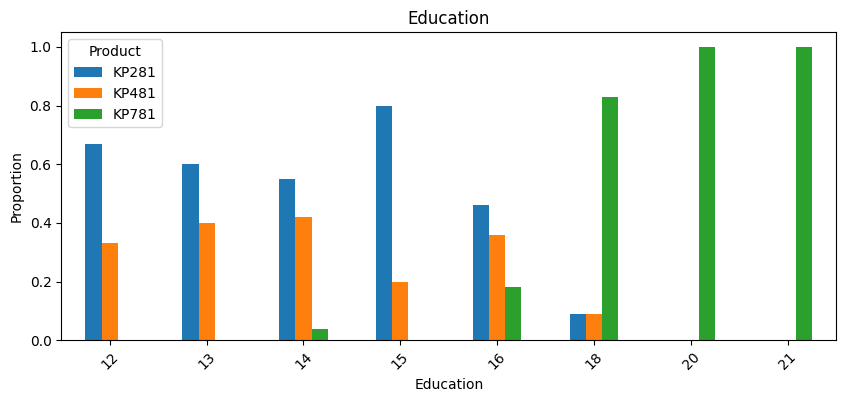

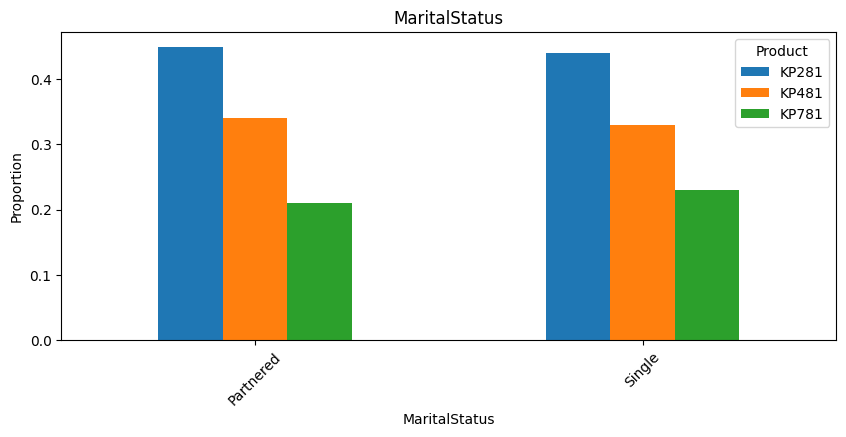

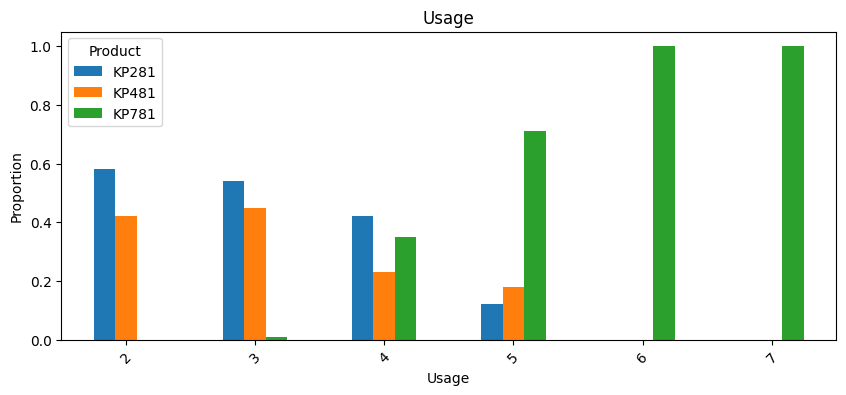

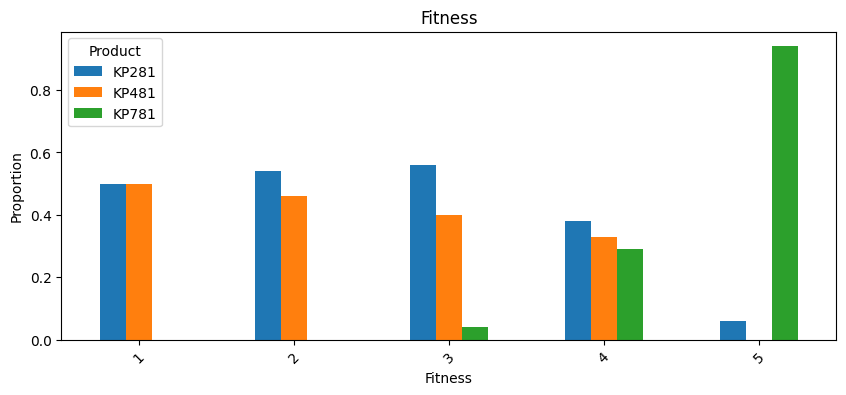

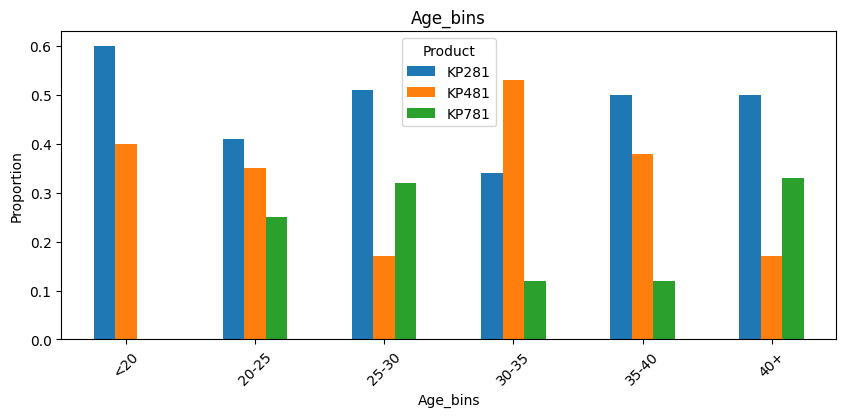

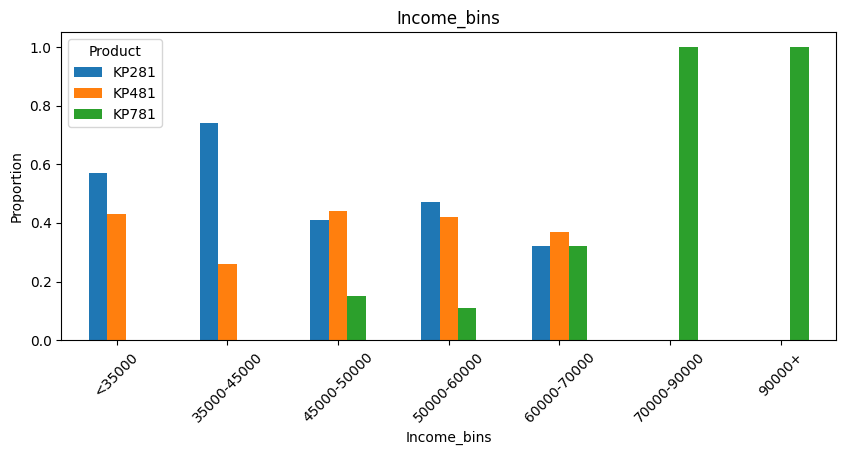

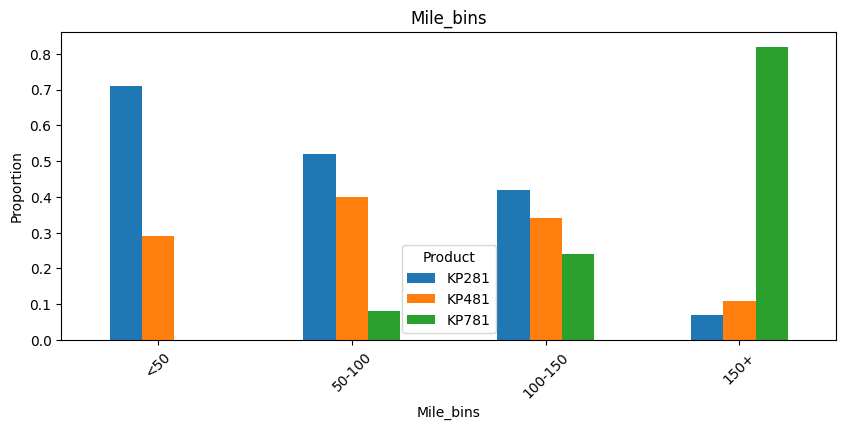

In [54]:
cat_cols=['Gender','Education', 'MaritalStatus', 'Usage','Fitness','Age_bins','Income_bins','Mile_bins']
for i in cat_cols:
    other= round(pd.crosstab(df[df[i].notnull()][i], df['Product']).\
        div(pd.crosstab(df[df[i].notnull()][i],df['Product']).apply(sum,1),0),2)
    ax = other.plot(kind ='bar', title = i, figsize = (10,4))
    ax.set_xlabel(i)
    ax.set_ylabel('Proportion')
    plt.xticks(rotation=45)
    plt.show()

Observations on the basis of above Categorical Plots
1) Around 55% of women prefer KP281 and only 10% prefer KP781. While around 35% of men prefer KP781.
2) 80% in Eduation level of 18 and everyone in Education levels of 20 or 21 use KP781 while below 14 level, no one uses KP781.
3) Marital Status implies no significant information on the usages of different treadmills.
4) Those who workout 6 or 7 days a week use KP781 while 60% of those who workout 5 days a week use KP781.
5) 95% of customers having fitness level of 5 use KP781 and none of those having fitness level below 3 use KP781.
6) No one below 20 years of age use KP781.
7) Above 70000 units of Income, people only use KP781 while in Incomes below 45000, no one uses KP781.
8) Almost 80% of people who run over 200 miles and those who run above 150 miles use KP781 and no one who runs below 50 miles use
KP781. The usage of KP281 decreases with the increase in miles while that of KP781 increases with the increase in miles.
    
 Let's deal with Probabilities -
Conditional probabilities - 
are the probability that an event occurs given that another event has occurred. For example, given that a customer is
female, what is the probability she’ll purchase a Mac?
Marginal Probablities - Divide the row or column total by the total sample size. Marginal probabilities are the probabilities that a single event
occurs with no regard to other events in the table. These probabilities do not depend on the condition of another outcome. Probability(Mac) :
Probability(Female)

Normalize: Default value is False Normalize by dividing all values by the sum of values:
If passed ‘all’ or True, will normalize over all values.
If passed ‘index’ will normalize over each row.
If passed ‘columns’ will normalize over each column.
If margins is True, will also normalize margin values.


In [8]:
pd.crosstab(index=df['Gender'],columns=df['Product'])

Product,KP281,KP481,KP781
Gender,,,
Female,40,29,7
Male,40,31,33


Recommendations:
1)Product Promotion:
Since around 55% of women prefer KP281, and only 10% prefer KP781, consider targeted marketing campaigns to increase awareness and interest in KP781 among women.
Create promotional offers or discounts specifically targeting women to encourage them to try KP781.
2)Education Level Targeting:
Focus marketing efforts on customers with education levels of 18 and 20-21, as they are more inclined to use KP781.
Highlight features or benefits of KP781 that align with the preferences of customers in these education brackets.
3)Usage Frequency Insights:
For customers who workout 6 or 7 days a week, promote the benefits of using KP781, emphasizing its suitability for regular and intense workouts.
Consider loyalty programs or special offers for customers with high usage frequency to encourage brand loyalty.
4)Fitness Level Targeting:
Since 95% of customers with fitness level 5 use KP781, position KP781 as a premium treadmill suitable for high-intensity workouts and advanced fitness enthusiasts.
Develop marketing messages highlighting the advanced features and capabilities of KP781 for fitness enthusiasts.
5)Age Group Targeting:
Develop marketing campaigns targeting customers above 20 years of age, as they are more likely to use KP781.
Highlight the comfort, durability, and advanced features of KP781 suitable for customers in this age group.
6)Income Level Targeting:
Target customers with higher income levels (above 70,000 units of income) as they exclusively use KP781.
Position KP781 as a high-end product offering premium features and value for customers with higher disposable income.
7)Miles Run Insights:
Since almost 80% of people who run over 200 miles prefer KP781, emphasize the durability and performance of KP781 for long-distance running.
Create marketing content showcasing testimonials or success stories of customers using KP781 for marathon training or long-distance running.
8)Market Segmentation:
Segment the market based on preferences identified in the insights (gender, education level, usage frequency, fitness level, age group, income level, miles run).
Tailor marketing messages, promotions, and product positioning strategies to each segment to maximize appeal and engagement.
9)Product Development:
Consider introducing new features or variations of KP781 to better cater to the preferences of different customer segments identified.
Conduct surveys or focus groups to gather feedback and insights for product improvement and innovation.
10)Customer Engagement:
Engage with existing customers who prefer KP781 to gather testimonials, reviews, and feedback.
Utilize social media platforms and online communities to foster engagement and brand advocacy among KP781 users.